### **Pasos para generar los eventos de Monte Carlo usando MadGraph5, Delphes y Pythia8.**
realizado: Sergio Duque Mejía - 1036654435

Se ejecuta los siguientes pasos despues de ingresar al clustercien y al servidor wn0:
```
$ cd /cms/mc/MG5_aMC_v3_1_1/
$ source /opt/root6/bin/thisroot.sh
$ python2 bin/mg5_aMC
 -------------------------
$ import model UFO
$ generate p p > zp > b b~
$ output PpToZp_BBbar
 -------------------------
$ cd PpToZp_BBbar/Cards/
--------------------------
|-$ nano me5_configuration.txt
    | automatic_html_opening = False
    | run_mode = 2
    | nb_core = None
|-$ nano param_card.dat
    | INFORMATION FOR MASS:
    ---| 5.000000e+01 # MZp
|-$ nano run_card.dat
    | zpTobbar = run_tag
    | 50000 = nevents
    | False = use_syst
---------------------------
$ cd ..
$ python2 bin/madevent
$ launch
$ shower=Pythia8
$ detector=Delphes
```
**Presionar "Enter" 2 veces y esperar que se generen todos los eventos.**
```
$ cd run_01
$ scp ruta/del/archivo/zpTobbar_delphes_events.root ruta/donde/guardar/
```
Para visualizar inicialmente los datos, en la terminal local donde se encuentre el archivo:
```
$ root -l
$ TBrowser b("zpTobbar_delphes_events.root")
```
Tambien se puede realizar un grafico rapido:
```
$ Delphes->Draw("Jet.PT")
```
Para obtener todos los datos que se desean analizar, en formato de pandas Dataframe: Utilizar el codigo de Tomas llamado: CoffeaDelphes.py
Se importa el metodo Converter:
```
from CoffeaDelphes import Converter
```




## Análisis de los Datos

In [71]:
from CoffeaDelphes import Converter
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])


In [74]:
fname = "FirstTry.root" # archivo .root de eventos generados con Delphes.
tree = Converter(fname) # Generar el objeto tree
events = {"Jet": ["PT", "Eta", "Phi", "Mass", "BTag"],
          "MissingET": ["MET", "Phi"],
          "Muon": ["PT", "Eta", "Phi", "Charge"],
          "Electron": ["PT", "Eta", "Phi", "Charge"]} # generar un diccionario con los eventos que se desean.
tree.generate(events) # ingresar en
data = tree.df

In [75]:
data.head() # Visualizar los datos obtenidos

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,missinget_met,missinget_phi,muon_pt0,muon_eta0,muon_phi0,muon_charge0,electron_pt0,electron_eta0,electron_phi0,electron_charge0
0,21.367420,9.085097,8.208461,8.164554,-1.784656,0.782363,-1.289175,-3.951507,-1.055693,-1.805059,...,14.291249,1.823516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.767849,26.577850,15.126513,15.042850,-2.312873,-1.188118,0.097740,-2.354494,0.329750,2.888623,...,6.250037,-2.289970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46.115936,25.973518,16.201700,13.250788,-1.318366,0.026184,2.595224,-0.106282,2.600109,-1.118862,...,11.779110,0.753327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.558125,41.137638,19.687809,16.474083,-0.817596,-0.013047,-0.809477,-1.074690,-1.360671,1.698474,...,3.267369,-2.711720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39.202892,34.013050,26.401060,10.686799,2.298855,1.515704,1.406222,3.887902,-2.837028,-0.160169,...,11.503487,0.952924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns # Se observa las columnas generadas

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met',
       'missinget_phi'],
      dtype='object')

## Graficas de los Pt(b1), Pt(b2)

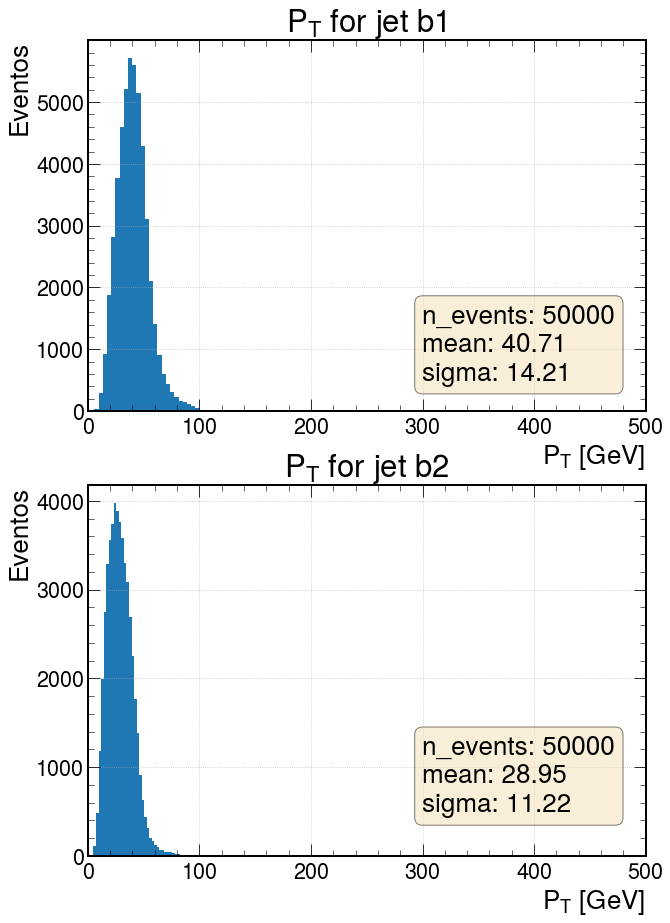

In [65]:
fig = plt.figure(figsize=(10,15))

box_style=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text = "n_events: {}".format(data["jet_pt0"].count())+"\n"+"mean: {}".format(round(data["jet_pt0"].mean(),2))+"\n"+"sigma: {}".format(round(data["jet_pt0"].std(),2))
text2 = "n_events: {}".format(data["jet_pt1"].count())+"\n"+"mean: {}".format(round(data["jet_pt1"].mean(),2))+"\n"+"sigma: {}".format(round(data["jet_pt1"].std(),2))

ax1 = plt.subplot(211)
data["jet_pt0"].hist(bins=50)
ax1.set_title("$P_{T}$ for jet b1")
ax1.set_xlabel("$P_{T}$ [GeV]")
ax1.set_ylabel("Eventos")
ax1.text(300,500, text,bbox=box_style)
plt.xlim(0,500)

ax2 = plt.subplot(212)
data["jet_pt1"].hist(bins=50)
ax2.set_title("$P_{T}$ for jet b2")
ax2.set_xlabel("$P_{T}$ [GeV]")
ax2.set_ylabel("Eventos")
ax2.text(300,500, text2,bbox=box_style)

plt.xlim(0,500)
plt.show()    

## Masa invariante en Colisionadores de particulas:

$\begin{equation}
M^{2} = 2P_{T1}P_{T2}[ cosh(\eta _{1} - \eta _{2}) - cos(\phi _{1} - \phi _{2}) ]
\end{equation}$

In [7]:
# Se definen los pt1,pt2,eta1,eta2,phi1,phi2 de los datos recolectados.
pt1 = data["jet_pt0"].fillna(0)
pt2 = data["jet_pt1"].fillna(0)
eta1 = data["jet_eta0"].fillna(0)
eta2 = data["jet_eta1"].fillna(0)
phi1 = data["jet_phi0"].fillna(0)
phi2 = data["jet_phi1"].fillna(0)

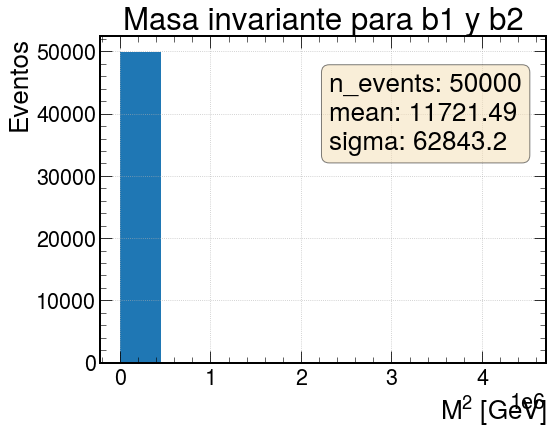

In [61]:
# Se calcula la masa invariante usando la formula.

inv_mass = 2*pt1*pt2*(np.cosh(eta1-eta2) - np.cos(phi1-phi2))
inv_mass = inv_mass.replace(0,np.nan)
text3 = "n_events: {}".format(inv_mass.count())+"\n"+"mean: {}".format(round(inv_mass.mean(),2))+"\n"+"sigma: {}".format(round(inv_mass.std(),2))

ax1 = plt.subplot(111)
inv_mass.hist(figsize=(8,6))
ax1.set_title("Masa invariante para b1 y b2")
ax1.set_xlabel("$M^{2}$ [GeV]")
ax1.set_ylabel("Eventos")
ax1.text(11.5**6,5.7**6, text3,bbox=box_style)
plt.show()